<a href="https://colab.research.google.com/github/Harshalkumar96/EDA_Hotel_Booking_Analysis_-Capstone_Project-/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

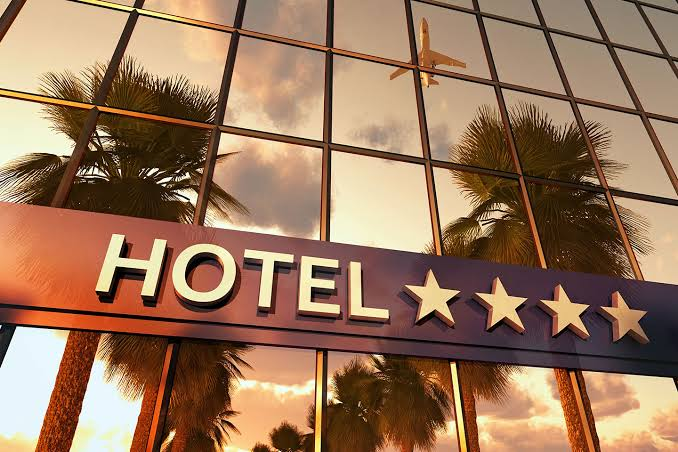

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings 
filterwarnings ('ignore')


In [2]:
# Mounting Google drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading .csv file 
path = ('/content/drive/MyDrive/Capstone Projects csv/Hotel Bookings.csv')
df = pd.read_csv(path)

# Data Exploration

In [4]:
# Set maximum columns to be display in datafram as 36
pd.set_option("display.max_columns", 36)
plt.style.use('seaborn')


In [5]:
# First 5 rows of dataset
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
# Number of rows & columns in dataset 
df.shape

(119390, 32)

In [7]:
print('Our Dataset having {0} rows and {1} columns in it.'.format(df.shape[0] , df.shape[1]))

Our Dataset having 119390 rows and 32 columns in it.


In [8]:
# Information about numerical columns in dataset = mean values , min,max values.
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
# NaN values below shows us that those are non numerical columns (categorical data)
df.describe(include = 'all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390.000000,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,12,NaN,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92310,48590,56477,97870,NaN,NaN,NaN,85994,74053,NaN,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,NaN,NaN,NaN,NaN,0.031912,0.087118,0.137097,NaN,NaN,0.221124,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,NaN,NaN,NaN,NaN,0.175767,0.844336,1.497437,NaN,NaN,0.652306,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [10]:
# below we can see non-null entries & Datatype of each respective column
# object means string(str) datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

So we have **4 float columns**, **16 int columns** & **12 str type columns** 

In [11]:
# Columns in dataset 
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [12]:
# column names list
print('we have these columns in our dataset =>' + '\033[1m' + '{0}'.format(str(df.columns)) + '\033[0m')

we have these columns in our dataset =>Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


In [13]:
# Making copy of our dataset 
df2 = df.copy()

In [14]:
# converting essential str date columns into datetime
df2['reservation_status_date'] = pd.to_datetime(df2['reservation_status_date'], format = '%Y-%m-%d')

# Data Cleaning

In [15]:
# check any duplicate rows or not 
df2.duplicated().value_counts()

False    87396
True     31994
dtype: int64

**We have 31994 dupilicate rows in our dataset, & so we will drop all of the duplicate rows**

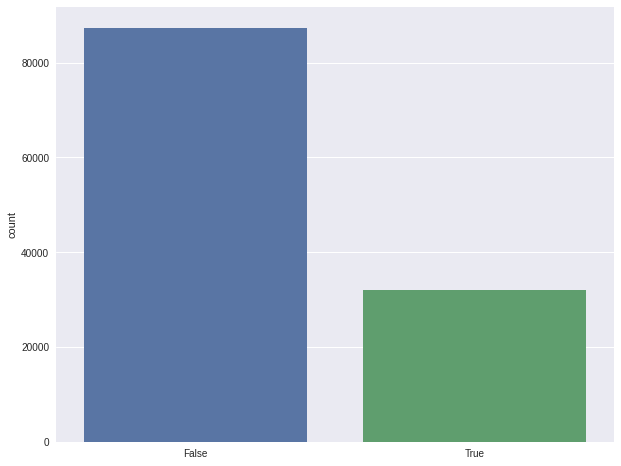

In [16]:
# let see the proportion of duplicate rows through visualization
plt.figure(figsize = (10,8))
sns.countplot(x = df2.duplicated())

In [17]:
# let's drop the duplicate rows
df2 = df2.drop_duplicates()

In [18]:
# now let's check the shape of dataset again
df2.shape

(87396, 32)

In [19]:
#checking for Null Values
df2.isna().sum().sort_values(ascending=False)[:6].reset_index().rename(columns={'index':'Columns',0:'Null values'})

,Columns,Null values
0,company,82137
1,agent,12193
2,country,452
3,children,4
4,reserved_room_type,0
5,assigned_room_type,0


Text(0.5, 1.0, 'Places of missing values in column')

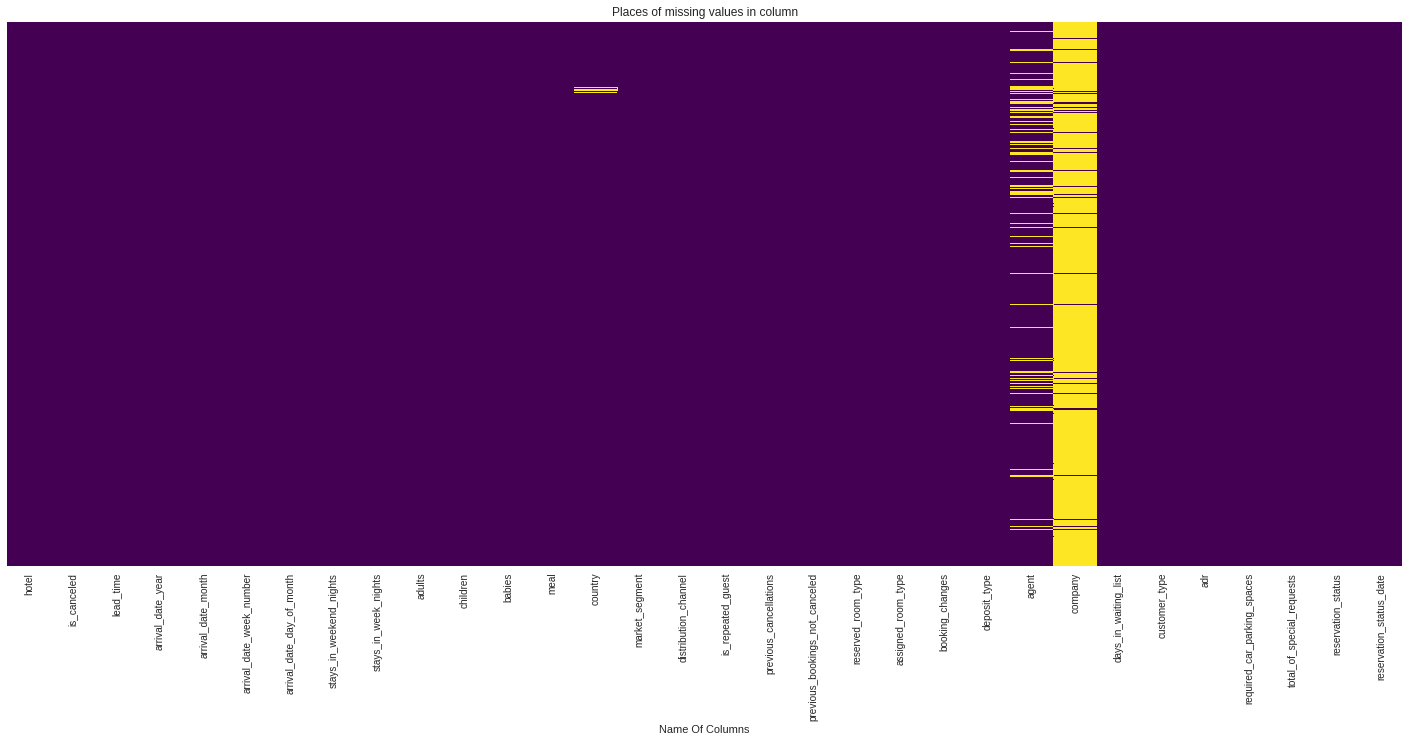

In [20]:
# Visulaizing null values through heatmap.
plt.figure(figsize=(25, 10))
sns.heatmap(df2.isnull(), cbar=False, yticklabels=False,cmap='viridis')
plt.xlabel("Name Of Columns")
plt.title("Places of missing values in column")

**We've found Null values in Company, agent, Country, children columns**


**1.   for company and agent wwe can fill the Missing values with 0**

**2.   for country we can  fill Missing values with 'Others'. ( assuming while collecting data country was not found so user selected the 'Others' option.)**



**3.   Since the count of missing values in Children Column is only 4, so we can replace with 0 considering no childrens.**


In [21]:
# Filling/replacing null values with 0.
null_columns=['agent','children','company']
for col in null_columns:
  df2[col].fillna(0,inplace=True)


# Replacing NA values with 'others'
df2['country'].fillna('others',inplace=True)


In [22]:
#Successfully handled  Null Values
df2.isna().sum().sort_values(ascending=False)[:6].reset_index().rename(columns={'index':'Columns',0:'Null values'})

,Columns,Null values
0,hotel,0
1,is_canceled,0
2,reservation_status,0
3,total_of_special_requests,0
4,required_car_parking_spaces,0
5,adr,0


In [23]:
# droppping all the rows in which addtion of of adlults ,children and babies is 0. That simply means  no bookings were made.
len(df2[df2['adults']+df2['babies']+df2['children']==0])
df2.drop(df2[df2['adults']+df2['babies']+df2['children']==0].index,inplace=True)

In [24]:
# Checking the unique values in categorical columns.
categorical_cols=list(set(df2.drop(columns=['reservation_status_date','country','arrival_date_month']).columns)-set(df2.describe()))
for col in categorical_cols:
  print(f'Unique values in column {col} are:, {(df2[col].unique())}')

Unique values in column deposit_type are:, ['No Deposit' 'Refundable' 'Non Refund']
Unique values in column customer_type are:, ['Transient' 'Contract' 'Transient-Party' 'Group']
Unique values in column reserved_room_type are:, ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']
Unique values in column market_segment are:, ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
Unique values in column meal are:, ['BB' 'FB' 'HB' 'SC' 'Undefined']
Unique values in column assigned_room_type are:, ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'L' 'K']
Unique values in column reservation_status are:, ['Check-Out' 'Canceled' 'No-Show']
Unique values in column hotel are:, ['Resort Hotel' 'City Hotel']
Unique values in column distribution_channel are:, ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']


In [25]:
# lets add some new columns

df2['total_people'] = df2['adults'] + df2['babies'] + df2['children']   
df2['total_stay'] = df2['stays_in_weekend_nights'] + df2['stays_in_week_nights']

In [26]:
# now let's overlook our upgraded dataset
df2.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people,total_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,2


In [27]:
# Checking the final rows and columns
df2.shape

(87230, 34)

# Exploratory Data Analysis

#Univeriate Anslysis

# 1). Which hotel is preferred by most of the customers?

In [28]:
# See which hotel is preferred most 
most_preferred_hotel = pd.DataFrame(df2.hotel.value_counts().reset_index().values, columns=["hotel_name", "occurence"])

most_preferred_hotel

,hotel_name,occurence
0,City Hotel,53274
1,Resort Hotel,33956


**City hotel have more counts.So ,it have more number of bookings and preferred by most of the customers**

Text(0.5, 1.0, 'Pie Chart for Most Preffered  Hotel')

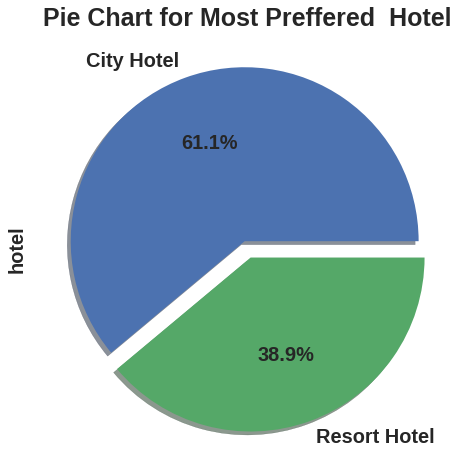

In [29]:
# visualization by pie chart =>
# first Setting fontsizes,fontweight,label weight for lebels,titles.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15


df2['hotel'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)   
plt.title('Pie Chart for Most Preffered  Hotel')

### **Observation**
### City Hotel is most preffered hotel by guests. Thus city hotels has maximum bookings.

# 2). What is the pecentage of cancellation?

Text(0.5, 1.0, 'Cancellation and non Cancellation')

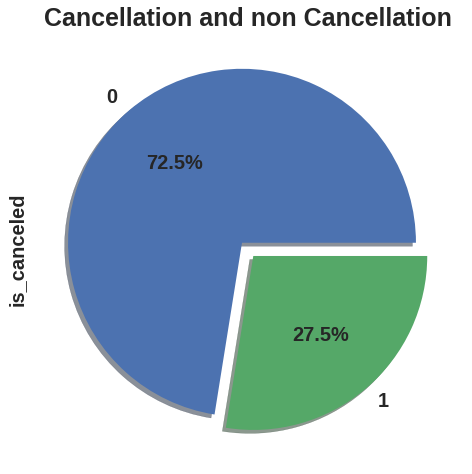

In [30]:
df2['is_canceled'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)
plt.title("Cancellation and non Cancellation")

### **Observation :**
### 0= not cancelled
### 1= cancelled

### **27.5 % of the bookings were cancelled.**

#3) Which Agent made the most bookings?

In [31]:
# highest bookings made by agents
highest_bookings= df2.groupby(['agent'])['agent'].agg({'count'}).reset_index().rename(columns={'count': "Most_Bookings" }).sort_values(by='Most_Bookings',ascending=False)

 # as agent 0 was NAN value and we replaced it with 0 and indicates no bookings.so droping.
highest_bookings.drop(highest_bookings[highest_bookings['agent']==0].index,inplace=True) 

# taking top 10 bookings made by agent
top_ten_highest_bookings=highest_bookings[:10]

top_ten_highest_bookings

,agent,Most_Bookings
9,9.0,28721
174,240.0,13028
14,14.0,3342
7,7.0,3294
183,250.0,2779
175,241.0,1644
27,28.0,1493
8,8.0,1383
1,1.0,1228
6,6.0,1117


Text(0.5, 1.0, 'Most Bookings Made by the agent')

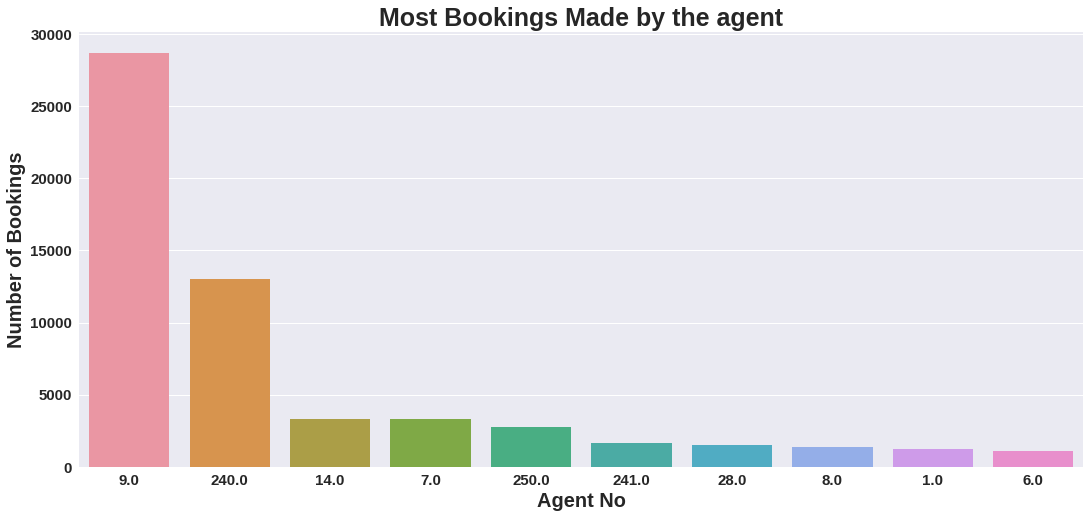

In [32]:
# Visualizaing using the graph

plt.figure(figsize=(18,8))
sns.barplot(x=top_ten_highest_bookings['agent'],y=top_ten_highest_bookings['Most_Bookings'],order=top_ten_highest_bookings['agent'])
plt.xlabel('Agent No')
plt.ylabel('Number of Bookings')
plt.title("Most Bookings Made by the agent")


### **Observation**
### **Agent ID no: 9 made most of the bookings**

# 4). What is the Percentage of repeated guests?

Text(0.5, 1.0, ' Percentgae (%) of repeated guests')

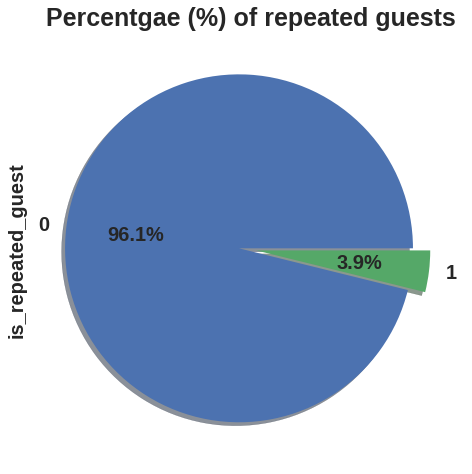

In [33]:
df2['is_repeated_guest'].value_counts().plot.pie(explode=(0.05,0.05),autopct='%1.1f%%',shadow=True,figsize=(12,8),fontsize=20)

plt.title(" Percentgae (%) of repeated guests")

### **Observation:**
### Percentage of repeated guests is very less which is only 3.9 %.
###In order to know the reson behind this, we should take feedbacks from guests and try to imporve the services.

#5). What is the percentage distribution of required_car_parking_spaces?

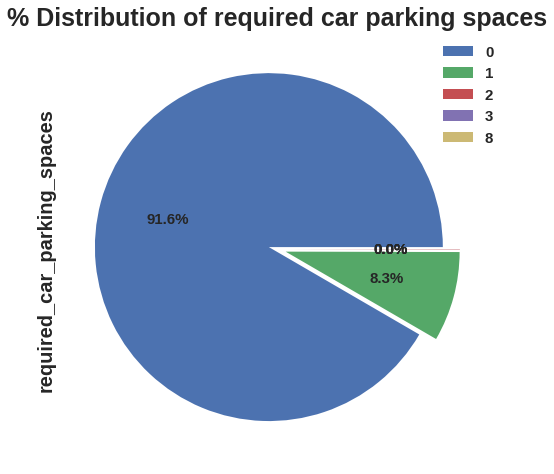

In [34]:
df2['required_car_parking_spaces'].value_counts().plot.pie(explode=[0.05]*5, autopct='%1.1f%%',shadow=False,figsize=(12,8),fontsize=15,labels=None)

labels=df2['required_car_parking_spaces'].value_counts().index
plt.title('% Distribution of required car parking spaces')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

### **Observation**
### 91.6 % guests did not required the parking space. only 8.3 % guests required only 1 parking space.

#6). What is the percentage distribution of "Customer Type"?

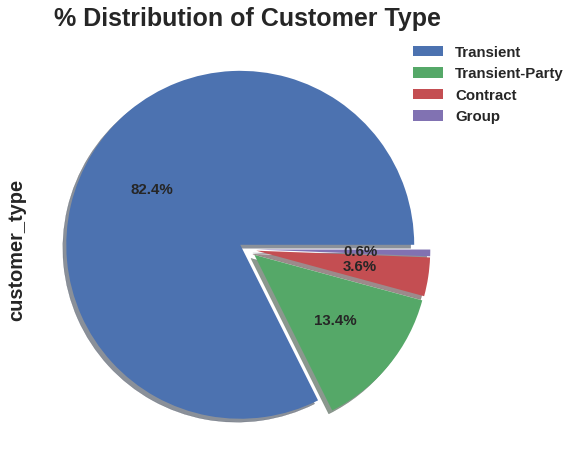

In [35]:
df2['customer_type'].value_counts().plot.pie(explode=[0.05]*4,shadow=True,autopct='%1.1f%%',figsize=(12,8),fontsize=15,labels=None)


labels=df2['customer_type'].value_counts().index.tolist()
plt.title('% Distribution of Customer Type')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

# 7)What is the percentage of booking changes made by the customer.?

Text(0, 0.5, 'Percentage(%)')

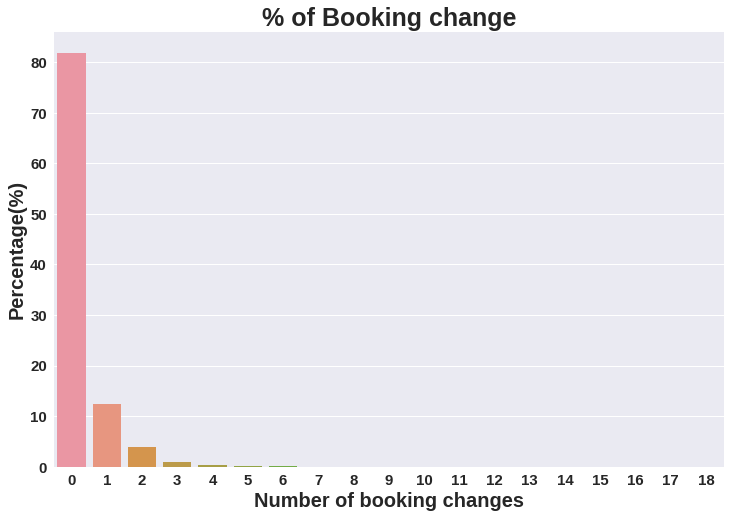

In [36]:
booking_changes_df=df2['booking_changes'].value_counts().reset_index().rename(columns={'index': "number_booking_changes",'booking_changes':'Counts'})

plt.figure(figsize=(12,8))
sns.barplot(x=booking_changes_df['number_booking_changes'],y=booking_changes_df['Counts']*100/df2.shape[0])
plt.title("% of Booking change")
plt.xlabel('Number of booking changes')
plt.ylabel('Percentage(%)')

### 0= 0 changes made in the booking
### 1= 1 changes made in the booking
### 2= 2 changes made in the booking

### **Observation**
### Almost 83% of the bookings were not changed by guests.


# 8)What is Percentage distribution of Deposite type ?

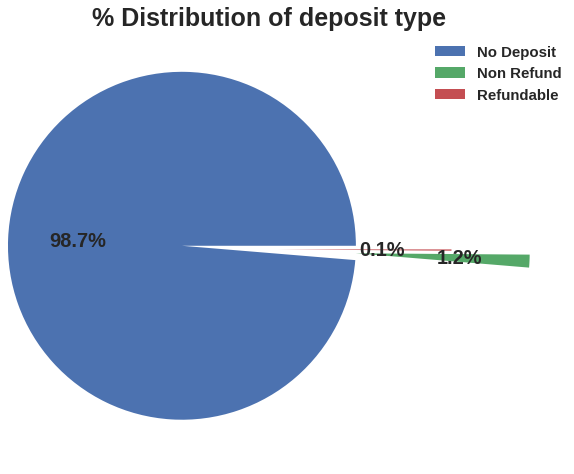

In [37]:
df2['deposit_type'].value_counts().plot.pie(explode=(0.5,0.5,0.05),autopct='%1.1f%%',shadow=False,figsize=(14,8),fontsize=20,labels=None)
plt.title("% Distribution of deposit type")
labels=df2['deposit_type'].value_counts().index.tolist()
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

### **Observation**
### 98.7 % of the guests prefer "No deposit" type of deposit.

# 9) Which type of food is mostly preferred by the guests?

Text(0.5, 1.0, 'Preferred Meal Type')

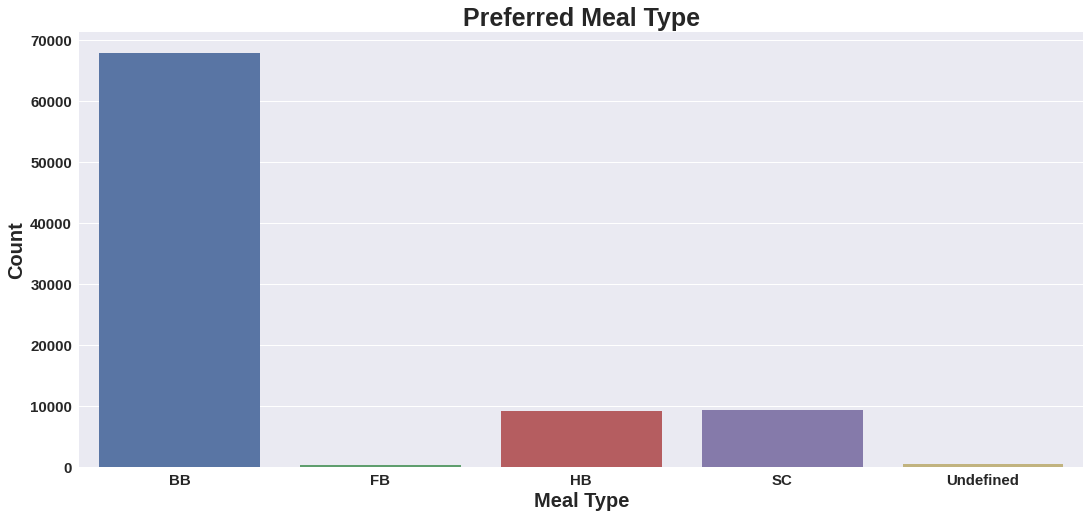

In [43]:
plt.figure(figsize=(18,8))
sns.countplot(x=df2['meal'])
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.title("Preferred Meal Type")


### **Observation**
### * So the most preferred meal type by the guests is BB 
### * HB and SC are equally preferred.

#10) From which country the most guests are coming?

Text(0.5, 1.0, 'Number of guests from diffrent Countries')

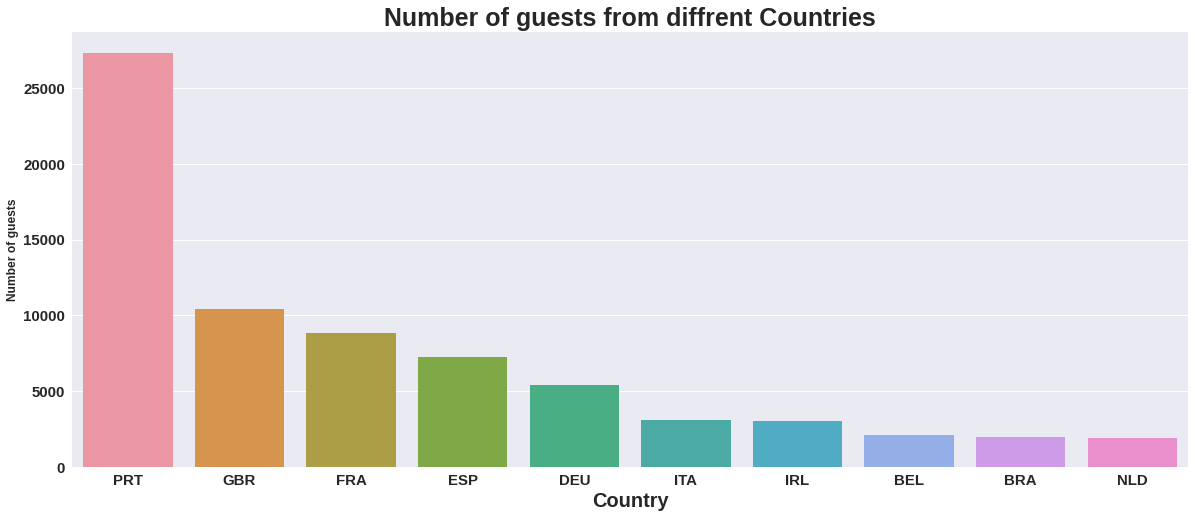

In [47]:
# Counting the guests from various countries.
country_df=df2['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'count of guests'})[:10]

# Visualizing by the graph
plt.figure(figsize=(20,8))
sns.barplot(x=country_df['country'],y=country_df['count of guests'])
plt.xlabel('Country')
plt.ylabel('Number of guests',fontsize=12)
plt.title("Number of guests from diffrent Countries")

### **Observation**
### Most of the guests are coming from portugal i.e more 25000 guests are from portugal
abbreevations for countries-



1.   PRT- Portugal
2.   GBR- United Kingdom
3.   FRA- France
4.   ESP- Spain
5.   DEU - Germany
6.   ITA -Itlay
7.   IRL - Ireland
8.   BEL -Belgium
9.   BRA -Brazil
10.  NLD-Netherlands





# 11)In which month most of the bookings happened?

In [49]:
# groupby arrival_date_month and taking the hotel count
bookings_by_months_df=df2.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts"})
# Create list of months in order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# creating df which will map the order of above months list without changing its values.
bookings_by_months_df['arrival_date_month']=pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)
# sorting by arrival_date_month
bookings_by_months_df=bookings_by_months_df.sort_values('arrival_date_month')

bookings_by_months_df

,arrival_date_month,Counts
4,January,4685
3,February,6083
7,March,7489
0,April,7900
8,May,8344
6,June,7756
5,July,10043
1,August,11242
11,September,6682
10,October,6921


Text(0, 0.5, 'Number of bookings')

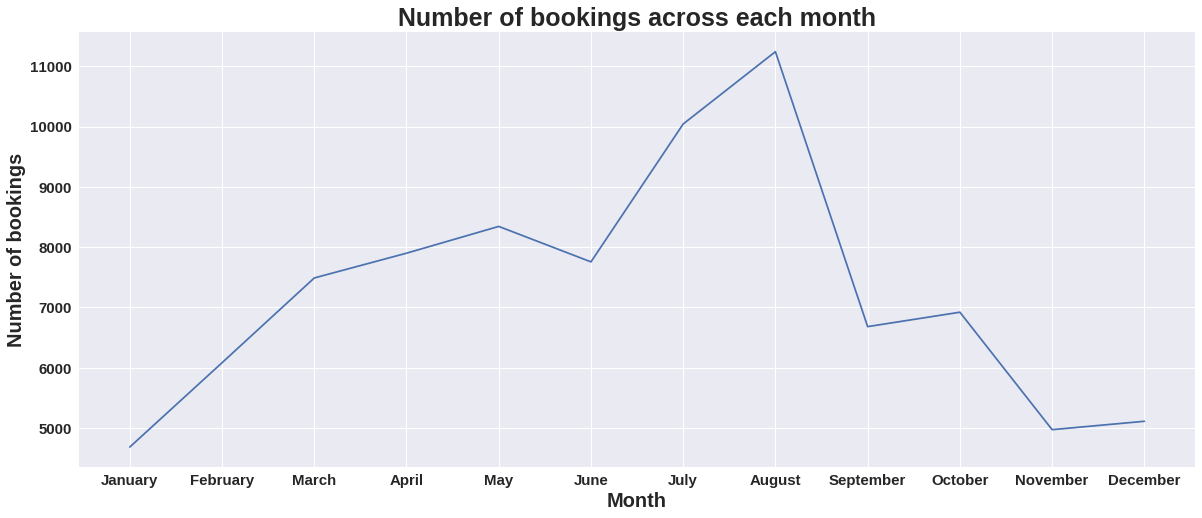

In [50]:
# set plot size
plt.figure(figsize=(20,8))

#pltting lineplot on x- months & y- booking counts
sns.lineplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['Counts'])

# set title for the plot
plt.title('Number of bookings across each month')
#set x label
plt.xlabel('Month')
#set y label
plt.ylabel('Number of bookings')


### **Observation**
From the above graph,We have seen that: 

*   August have highest number of bookings for both hotels.So we can say that it seems to be the best time for booking 
*   Vice versa,We can also say that January have minimum no. of booking .So,it could also seems to be the best time for booking








# 12) Which year had the highest bookings?

Text(0.5, 1.0, 'Year Wise bookings')

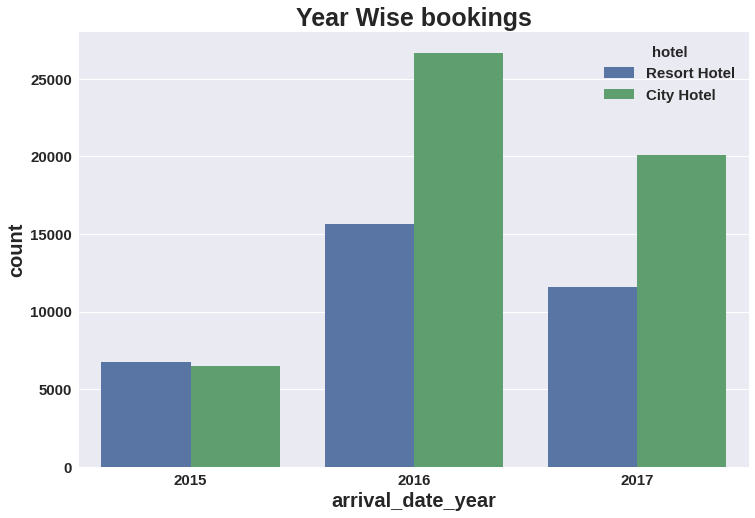

In [53]:
# set plot size
plt.figure(figsize=(12,8))

#  plot with countplot
sns.countplot(x=df2['arrival_date_year'],hue=df2['hotel'])
plt.title("Year Wise bookings")

### **Observation**
###2016 had the higest bookings.
###2015 had less 7000 bookings.
###overall City hotels had the most of the bookings.

# Bivariate and Multivariate Analysis



In [ ]:
# Bivariate and Multivariate Analysis

